In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

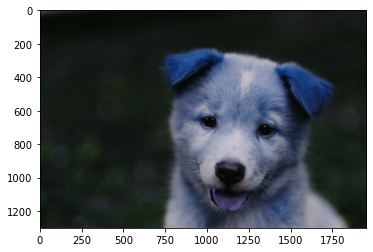

In [2]:
img = cv2.imread('../DATA/00-puppy.jpg')
plt.imshow(img);

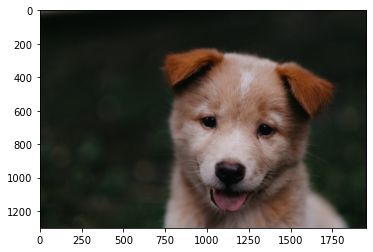

In [3]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img);

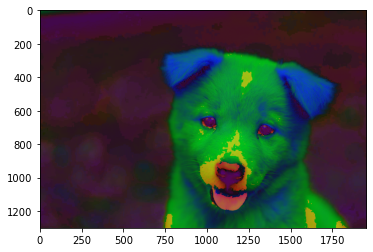

In [4]:
hsl_img = cv2.cvtColor(img,cv2.COLOR_RGB2HLS)
plt.imshow(hsl_img);

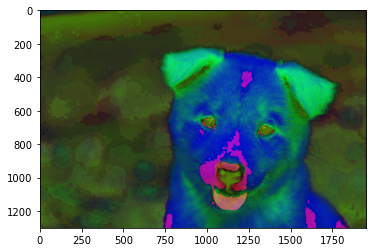

In [5]:
hsv_img = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img);

In [6]:
img1 = cv2.imread('../DATA/dog_backpack.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

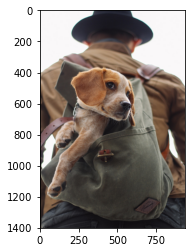

In [7]:
plt.imshow(img1);

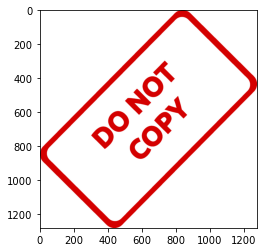

In [8]:
plt.imshow(img2);

In [9]:
img1.shape

(1401, 934, 3)

In [10]:
img2.shape

(1280, 1277, 3)

In [11]:
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

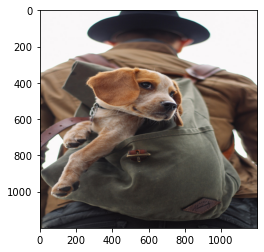

In [12]:
plt.imshow(img1);

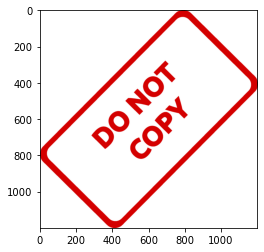

In [13]:
plt.imshow(img2);

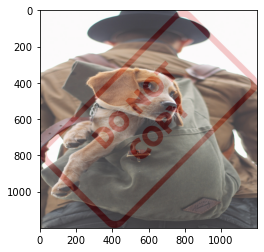

In [14]:
# BLENDING IMAGES OF THE SAME SIZE
blended_img = cv2.addWeighted(src1=img1,alpha=0.8,src2=img2,beta=0.2,gamma=1)
plt.imshow(blended_img);

In [15]:
# OVERLAYING A SMALL IMAGE ON TOP OF A LARGE IMAGE
img1 = cv2.imread('../DATA/dog_backpack.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [16]:
large_img = img1
small_img = img2

In [17]:
small_img = cv2.resize(small_img,(600,600))

In [18]:
large_img.shape, small_img.shape

((1401, 934, 3), (600, 600, 3))

In [19]:
x_offset = 250
y_offset = 700

In [20]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [21]:
large_img[y_offset:y_end,x_offset:x_end] = small_img

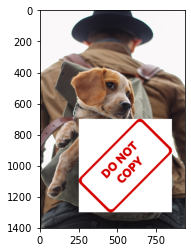

In [22]:
plt.imshow(large_img);

In [23]:
# BLENDING THE IMAGES OF DIFFERENT SIZES
img1 = cv2.imread('../DATA/dog_backpack.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [24]:
img1.shape

(1401, 934, 3)

In [25]:
img2.shape

(1280, 1277, 3)

In [26]:
img2 = cv2.resize(img2,(600,600))

In [27]:
x_offset = 934 - 600
y_offset = 1401 - 600

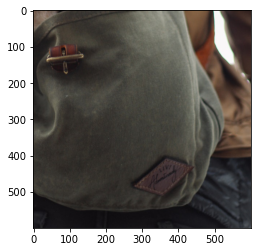

In [28]:
roi = img1[y_offset:1401,x_offset:934]
plt.imshow(roi);

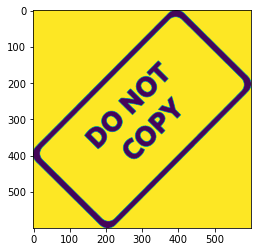

In [29]:
img2_gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
plt.imshow(img2_gray);

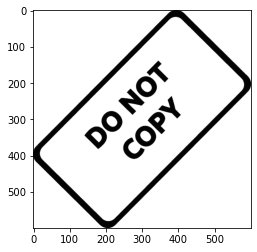

In [30]:
plt.imshow(img2_gray,cmap='gray');

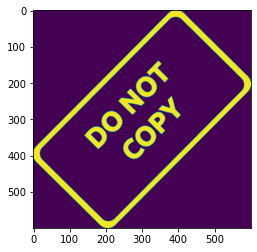

In [31]:
mask_inv = cv2.bitwise_not(img2_gray)
plt.imshow(mask_inv);

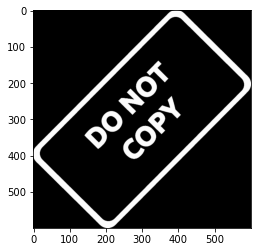

In [32]:
plt.imshow(mask_inv,cmap='gray');

In [33]:
mask_inv.shape

(600, 600)

In [34]:
white_bg = np.full(img2.shape,255,dtype=np.uint8)

In [35]:
white_bg.shape

(600, 600, 3)

In [36]:
net_bg = cv2.bitwise_or(white_bg,white_bg,mask=mask_inv)

In [37]:
net_bg.shape

(600, 600, 3)

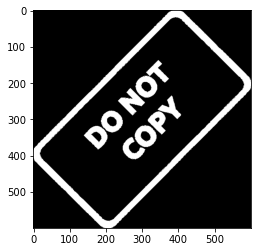

In [38]:
plt.imshow(net_bg);

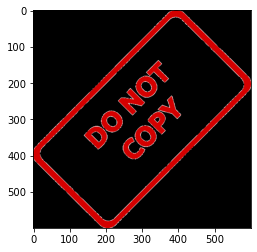

In [39]:
foreground = cv2.bitwise_or(img2,img2,mask=mask_inv)
plt.imshow(foreground);

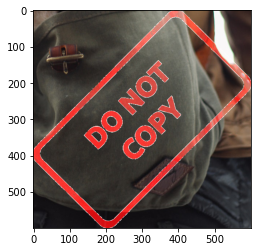

In [42]:
final_roi = cv2.bitwise_or(roi,foreground)
plt.imshow(final_roi);

In [44]:
large_img = img1
small_img = final_roi

In [45]:
large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img

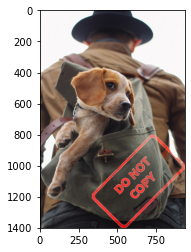

In [46]:
plt.imshow(large_img);